In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

D:\ProgramFile\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("nba_2013.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [3]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
data = data.dropna()

In [6]:
data.shape

(403, 31)

In [35]:
inputs = data.drop(["player", "bref_team_id", "season", "season_end", "pts", "pos"], axis = 1)
inputs.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,67,0.836,94,183,277,40,23,46,63,187
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,360,0.822,166,599,765,178,63,68,123,147
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,50,0.660,119,192,311,71,24,33,44,126


In [36]:
outputs = data[["pts"]]
outputs.head()

,pts
0,171
3,1330
4,328
6,1603
7,303


In [37]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)


In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
#neu nhu co mot so k co socre = nhau ->tim mse cua cac k = nhau
#mse << nho nhat -> chon k do 
list_k = []
list_r_score = []
n = int((y_train.shape[0]**0.5)/2)+ 1
for K_value in range(2, n ): #K_value = 2->7
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test) * 100
    list_r_score.append(score)
    print("The r^2 score is:", score, " for K-values", K_value)
    
vi_tri = list_r_score.index(max(list_r_score))
k = list_k[vi_tri]

print("\nThe optimal number of neighbors is ", k, " with R^2 score is: ", list_r_score[vi_tri])

The r^2 score is: 95.31221466905781  for K-values 2
The r^2 score is: 96.06420976068382  for K-values 3
The r^2 score is: 96.1181210659831  for K-values 4
The r^2 score is: 95.76457813303404  for K-values 5
The r^2 score is: 95.50812462855819  for K-values 6
The r^2 score is: 95.51703039959187  for K-values 7
The r^2 score is: 95.05009785251042  for K-values 8

The optimal number of neighbors is  4  with R^2 score is:  96.1181210659831


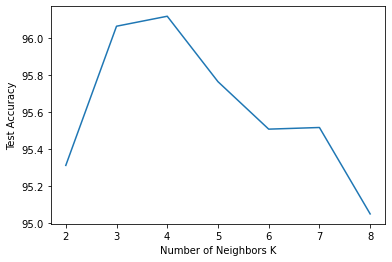

In [42]:
plt.plot(list_k, list_r_score)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Test Accuracy")
plt.show()

In [43]:
#-> chon k = 4
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [45]:
#kiem tra du lieu
y_predict = model.predict(X_test)

In [47]:
print("The training R^2 score: is: ", model.score(X_train, y_train))
print("The testting R^2 score: is: ", model.score(X_test, y_test))

The training R^2 score: is:  0.982806979234531
The testting R^2 score: is:  0.9611812106598311


In [48]:
# Score R^2 ca train va test deu cao, model khong vi overfitting